In [95]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

# 2

uniform 격자계 에서 시간에 대하여 Crank-Nicolson method를, 공간에 대하여 2차 central difference
scheme을 사용하여 정상상태(steady state)에 도달하도록 방정식을 푸시오. Exact solution과 계산하여 구한 정
상상태의 solution을 시간간격 Δt와 x, y 방향 격자수에 변화를 주어 plot하시오.

In [34]:
def S(x,y):
    s = 2*(2-x**2-y**2)
    return s


In [35]:
alpha = 1
n = 21
alpha = 1 # thermal diffusivity
x_list = np.linspace(-1, 1, n) # x grid points 
y_list = np.linspace(-1, 1, n) # y grid points 
X, Y = np.meshgrid(x_list, y_list) # create a meshgrid
h = x_list[1] - x_list[0] # grid spacing
dt = 0.1 # time step
t = 0 # initial time
beta = alpha * dt / (h**2) / 2 

In [36]:
pi = np.zeros((n, n)) # initialize pi
I = np.eye(n-2) # identity matrix

In [37]:
L = np.zeros((n-2, n-2)) # initialize pi
for i in range(n-2):
    L[i, i] = -2

    if i == 0:
        L[i, i+1] = 1
    elif i == n-3:
        L[i, i-1] = 1
    else:
        L[i, i-1] = 1
        L[i, i+1] = 1
A = (I - beta * L)
R = S(X[1:-1,1:-1], Y[1:-1,1:-1]) + (I + beta * L) @ ((I + beta * L) @ pi[1:-1, 1:-1].T).T

psi = np.linalg.solve(A, R)  # solve the linear system
pi_new = psi @ np.linalg.inv((I - beta * L).T)
pi_full = np.zeros((n, n))  # initialize full pi
pi_full[1:-1, 1:-1] = pi_new

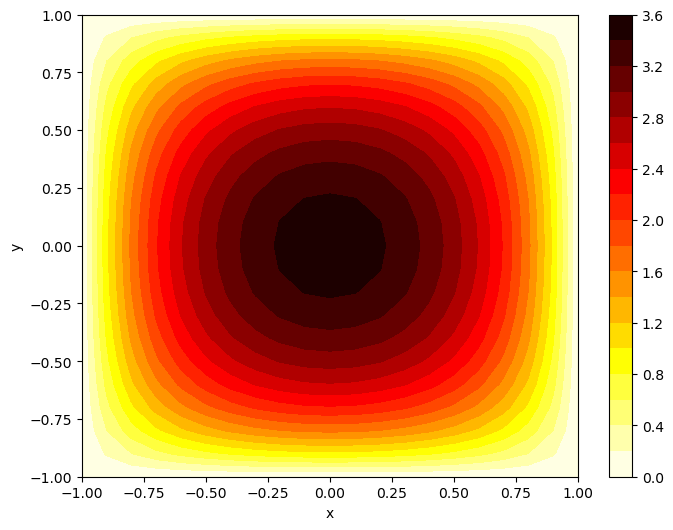

In [38]:
# existing code
plt.figure(figsize=(8,6))
plt.contourf(X, Y, pi_full, levels=20, cmap='hot_r')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

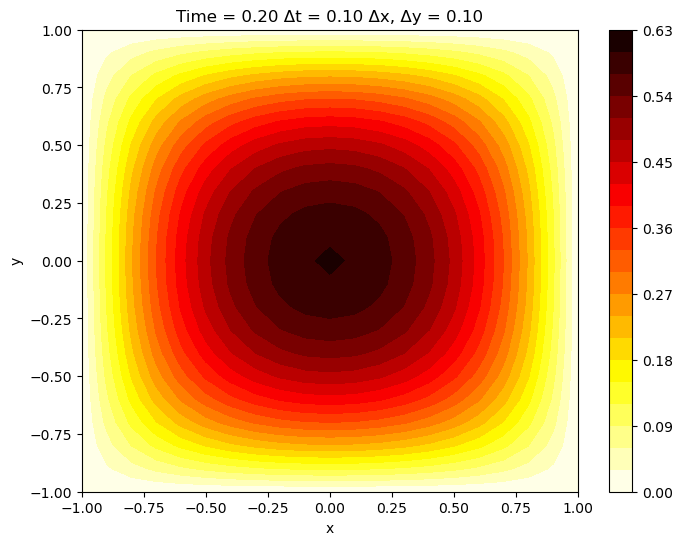

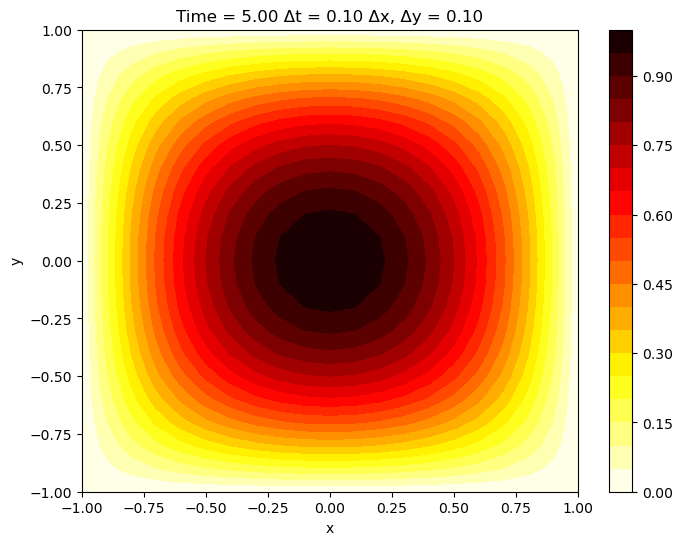

In [85]:
n = 21
alpha = 1 # thermal diffusivity
x_list = np.linspace(-1, 1, n) # x grid points 
y_list = np.linspace(-1, 1, n) # y grid points 
X, Y = np.meshgrid(x_list, y_list) # create a meshgrid
h = x_list[1] - x_list[0] # grid spacing
dt = 0.1 # time step
t = 0 # initial time
beta = alpha * dt / (h**2) / 2 

pi = np.zeros((n, n)) # initialize pi       
I = np.eye(n-2) # identity matrix
L = np.zeros((n-2, n-2)) # initialize pi

pi_list = [pi,]

for i in range(n-2):
    L[i, i] = -2

    if i == 0:
        L[i, i+1] = 1
    elif i == n-3:
        L[i, i-1] = 1
    else:
        L[i, i-1] = 1
        L[i, i+1] = 1

A = (I - beta * L)

for j in range(100):
    t = t + dt
    
    R = S(X[1:-1,1:-1], Y[1:-1,1:-1])*dt + (I + beta * L) @ ((I + beta * L) @ pi_list[j][1:-1, 1:-1].T).T
    psi = np.linalg.solve(A, R)  # solve the linear system
    pi_new = np.dot(psi, np.linalg.inv(A.T))
    pi_full = np.zeros((n, n))  # initialize full pi
    pi_full[1:-1, 1:-1] = pi_new
    pi_list.append(pi_full)

    if j in [1, 49,]:
        
        plt.figure(figsize=(8,6))
        plt.contourf(X, Y, pi_list[j+1], levels=20, cmap='hot_r')
        plt.colorbar()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Time = {t:.2f} Δt = {dt:.2f} Δx, Δy = {h:.2f}')
        plt.show()

In [40]:
def pi_exact(x,y):
    pi = (x**2-1)*(y**2-1)
    return pi

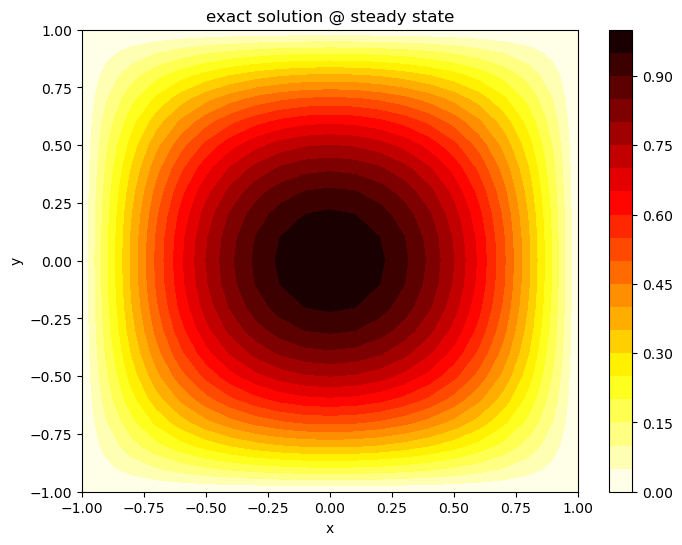

In [41]:
plt.figure(figsize=(8,6))
plt.contourf(X, Y, pi_exact(X, Y), levels=20, cmap='hot_r')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'exact solution @ steady state')
plt.show()

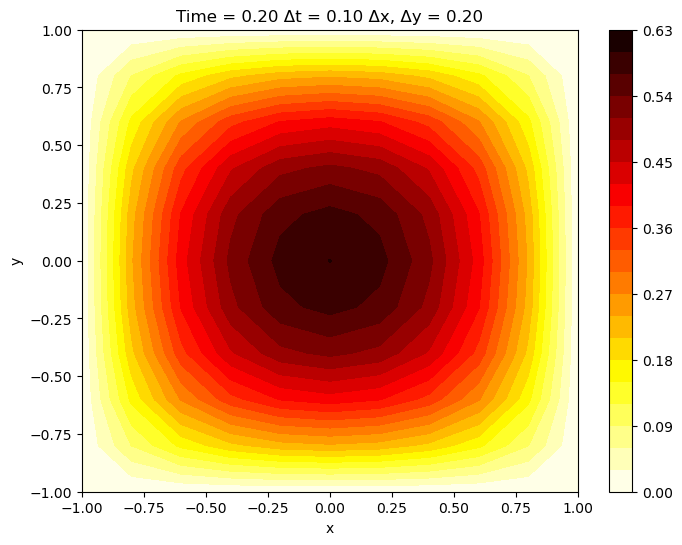

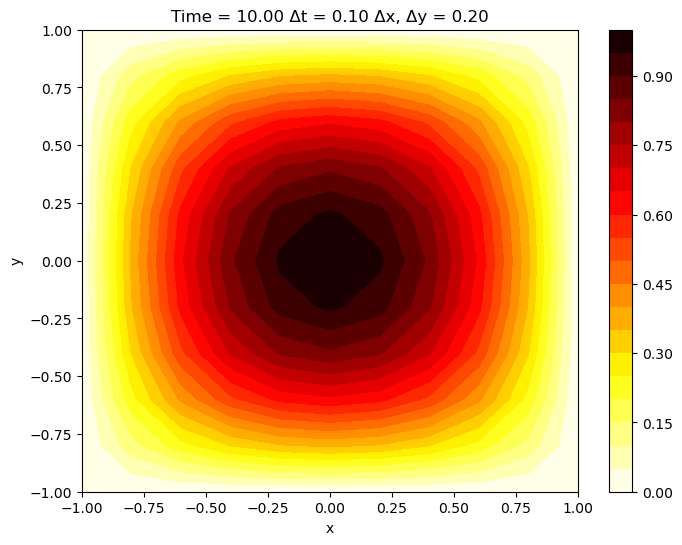

In [42]:
n = 11
alpha = 1 # thermal diffusivity
x_list = np.linspace(-1, 1, n) # x grid points 
y_list = np.linspace(-1, 1, n) # y grid points 
X, Y = np.meshgrid(x_list, y_list) # create a meshgrid
h = x_list[1] - x_list[0] # grid spacing
dt = 0.1 # time step
t = 0 # initial time
beta = alpha * dt / (h**2) / 2 

pi = np.zeros((n, n)) # initialize pi       
I = np.eye(n-2) # identity matrix
L = np.zeros((n-2, n-2)) # initialize pi

pi_list = [pi,]

for i in range(n-2):
    L[i, i] = -2

    if i == 0:
        L[i, i+1] = 1
    elif i == n-3:
        L[i, i-1] = 1
    else:
        L[i, i-1] = 1
        L[i, i+1] = 1

A = (I - beta * L)

for j in range(100):
    t = t + dt
    
    R = S(X[1:-1,1:-1], Y[1:-1,1:-1])*dt + (I + beta * L) @ ((I + beta * L) @ pi_list[j][1:-1, 1:-1].T).T
    psi = np.linalg.solve(A, R)  # solve the linear system
    pi_new = np.dot(psi, np.linalg.inv(A.T))
    pi_full = np.zeros((n, n))  # initialize full pi
    pi_full[1:-1, 1:-1] = pi_new
    pi_list.append(pi_full)

    if j in [1, 99,]:
        
        plt.figure(figsize=(8,6))
        plt.contourf(X, Y, pi_list[j+1], levels=20, cmap='hot_r')
        plt.colorbar()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Time = {t:.2f} Δt = {dt:.2f} Δx, Δy = {h:.2f}')
        plt.show()

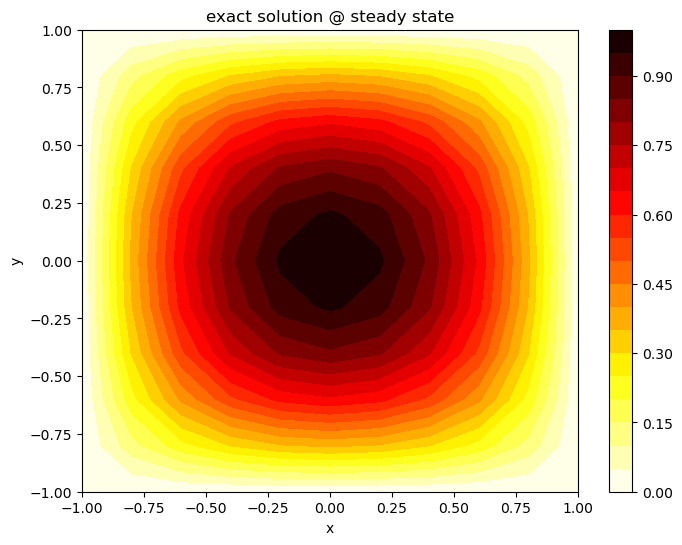

In [43]:
plt.figure(figsize=(8,6))
plt.contourf(X, Y, pi_exact(X, Y), levels=20, cmap='hot_r')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'exact solution @ steady state')
plt.show()

# 3

수치해석 결과의 order of accuracy를 시간과 공간에 대하여 분석하시오.

In [205]:
# Space
h_list = []
error_list = []
for n in tqdm(range(5,9,1)):
    alpha = 1 # thermal diffusivity
    x_list = np.linspace(-1, 1, n) # x grid points 
    y_list = np.linspace(-1, 1, n) # y grid points 
    X, Y = np.meshgrid(x_list, y_list) # create a meshgrid
    h = x_list[1] - x_list[0] # grid spacing
    dt = 0.0061 # time step
    t = 0 # initial time
    beta = alpha * dt / (h**2) / 2 

    pi = np.zeros((n, n)) # initialize pi       
    I = np.eye(n-2) # identity matrix
    L = np.zeros((n-2, n-2)) # initialize pi

    pi_list = [pi,]

    for i in range(n-2):
        L[i, i] = -2

        if i == 0:
            L[i, i+1] = 1
        elif i == n-3:
            L[i, i-1] = 1
        else:
            L[i, i-1] = 1
            L[i, i+1] = 1

    A = (I - beta * L)

    for j in range(1000):
        t = t + dt
        
        R = S(X[1:-1,1:-1], Y[1:-1,1:-1])*dt + (I + beta * L) @ ((I + beta * L) @ pi_list[j][1:-1, 1:-1].T).T
        psi = np.linalg.solve(A, R)  # solve the linear system
        pi_new = np.dot(psi, np.linalg.inv(A.T))
        pi_full = np.zeros((n, n))  # initialize full pi
        pi_full[1:-1, 1:-1] = pi_new
        pi_list.append(pi_full)
    error_list.append(np.linalg.norm(pi_list[-1] - pi_exact(X, Y), 2)*h)
    h_list.append(h)
    time.sleep(0.02)

100%|██████████| 4/4 [00:00<00:00, 18.25it/s]


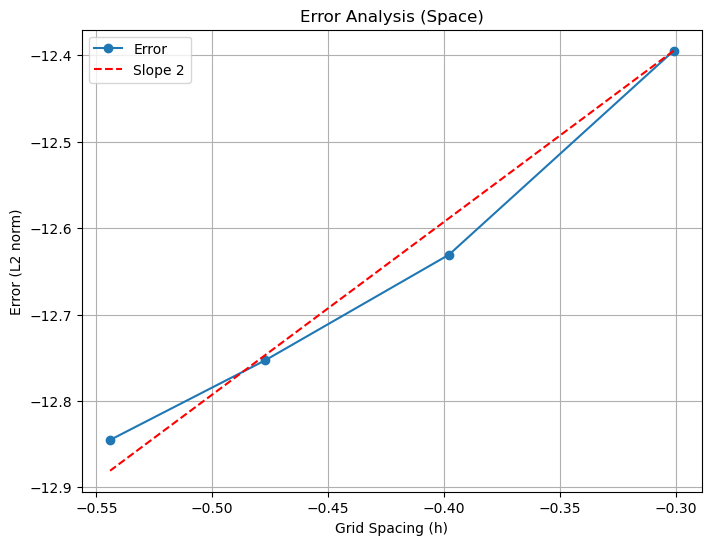

In [206]:
plt.figure(figsize=(8,6))
plt.plot(np.log10(h_list), np.log10(error_list), marker='o', label='Error')
plt.xlabel('Grid Spacing (h)')
plt.ylabel('Error (L2 norm)')
plt.plot(np.log10(h_list), 2*(np.log10(h_list)-np.log10(h_list[0]))+np.log10(error_list[0]), linestyle='--', color='r', label='Slope 2')
plt.title('Error Analysis (Space)')
plt.grid()
plt.legend()

In [207]:
from scipy.stats import linregress

print(f'order of accuracy: {linregress(np.log10(h_list), np.log10(error_list)).slope}')

order of accuracy: 1.8439572074731527


In [284]:
# Time
t_list = []
error_list = []
for k in tqdm(range(3,7,1)):
    n = 101
    alpha = 1 # thermal diffusivity
    x_list = np.linspace(-1, 1, n) # x grid points 
    y_list = np.linspace(-1, 1, n) # y grid points 
    X, Y = np.meshgrid(x_list, y_list) # create a meshgrid
    h = x_list[1] - x_list[0] # grid spacing
    dt = 0.1/k # time step
    t = 0 # initial time
    beta = alpha * dt / (h**2) / 2 

    pi = np.zeros((n, n)) # initialize pi       
    I = np.eye(n-2) # identity matrix
    L = np.zeros((n-2, n-2)) # initialize pi

    pi_list = [pi,]

    for i in range(n-2):
        L[i, i] = -2

        if i == 0:
            L[i, i+1] = 1
        elif i == n-3:
            L[i, i-1] = 1
        else:
            L[i, i-1] = 1
            L[i, i+1] = 1

    A = (I - beta * L)

    for j in range(int(100*k)):
        t = t + dt
        R = S(X[1:-1,1:-1], Y[1:-1,1:-1])*dt + (I + beta * L) @ ((I + beta * L) @ pi_list[j][1:-1, 1:-1].T).T
        psi = np.linalg.solve(A, R)  # solve the linear system
        pi_new = np.dot(psi, np.linalg.inv(A.T))
        pi_full = np.zeros((n, n))  # initialize full pi
        pi_full[1:-1, 1:-1] = pi_new
        pi_list.append(pi_full)
    error_list.append(np.linalg.norm(pi_list[-1] - pi_exact(X, Y), 2)*h)
    t_list.append(dt)
    time.sleep(0.02)

100%|██████████| 4/4 [00:01<00:00,  2.23it/s]


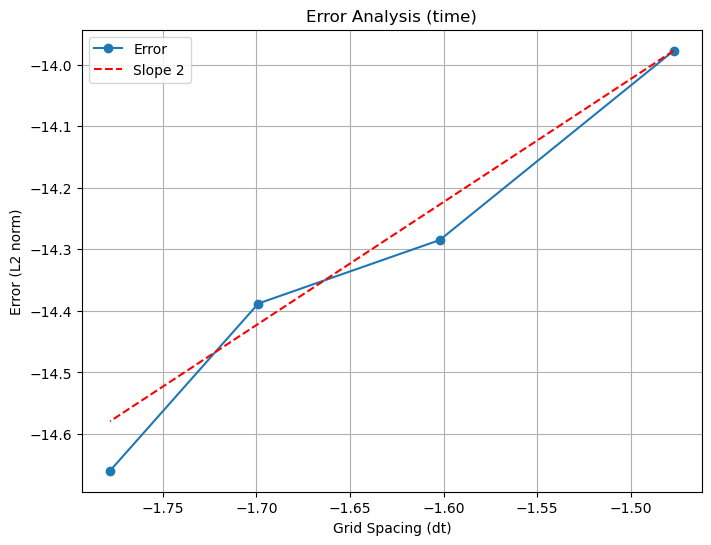

In [285]:
plt.figure(figsize=(8,6))
plt.plot(np.log10(t_list), np.log10(error_list), marker='o', label='Error')
plt.xlabel('Grid Spacing (dt)')
plt.ylabel('Error (L2 norm)')
plt.plot(np.log10(t_list), 2*(np.log10(t_list)-np.log10(t_list[0]))+np.log10(error_list[0]), linestyle='--', color='r', label='Slope 2')
plt.title('Error Analysis (time)')
plt.grid()
plt.legend()

In [286]:
from scipy.stats import linregress

print(f'order of accuracy: {linregress(np.log10(t_list), np.log10(error_list)).slope}')

order of accuracy: 2.1398725922002946
